In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [4]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

In [5]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.


eta=eta[:,0:600,0:1000]
ssh_mean=ssh_mean[0:600,0:1000]
ssha=eta-ssh_mean
print(shape(eta),shape(ssh_mean),shape(ssha))
lon=lon[0:1000]
lat=lat[0:600]
areamap=array([[0,len(lon)],[0,len(lat)]])

(90, 600, 1000) (600, 1000) (90, 600, 1000)


In [6]:
# If you want to Analyse multiple levels, please go to the Moving in Z section.
############################################################
### Add a contour check before starting the calculation#####
############################################################
eddytd=analyseddyzt(eta,lon,lat,0,90,1,25,15,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=========================================================================================>]100% Time Elapsed: 414 s  

In [7]:
eddytdn=analyseddyzt(eta,lon,lat,0,90,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

 0% [=========================================================================================>]100% Time Elapsed: 662 s  

In [8]:
threshold=1
eddysplotn=exeddy(eddytd,lat,lon,ssha[1,:,:],1,threshold,diagnostics=False)
eddysplot=exeddy(eddytdn,lat,lon,ssha[1,:,:],1,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


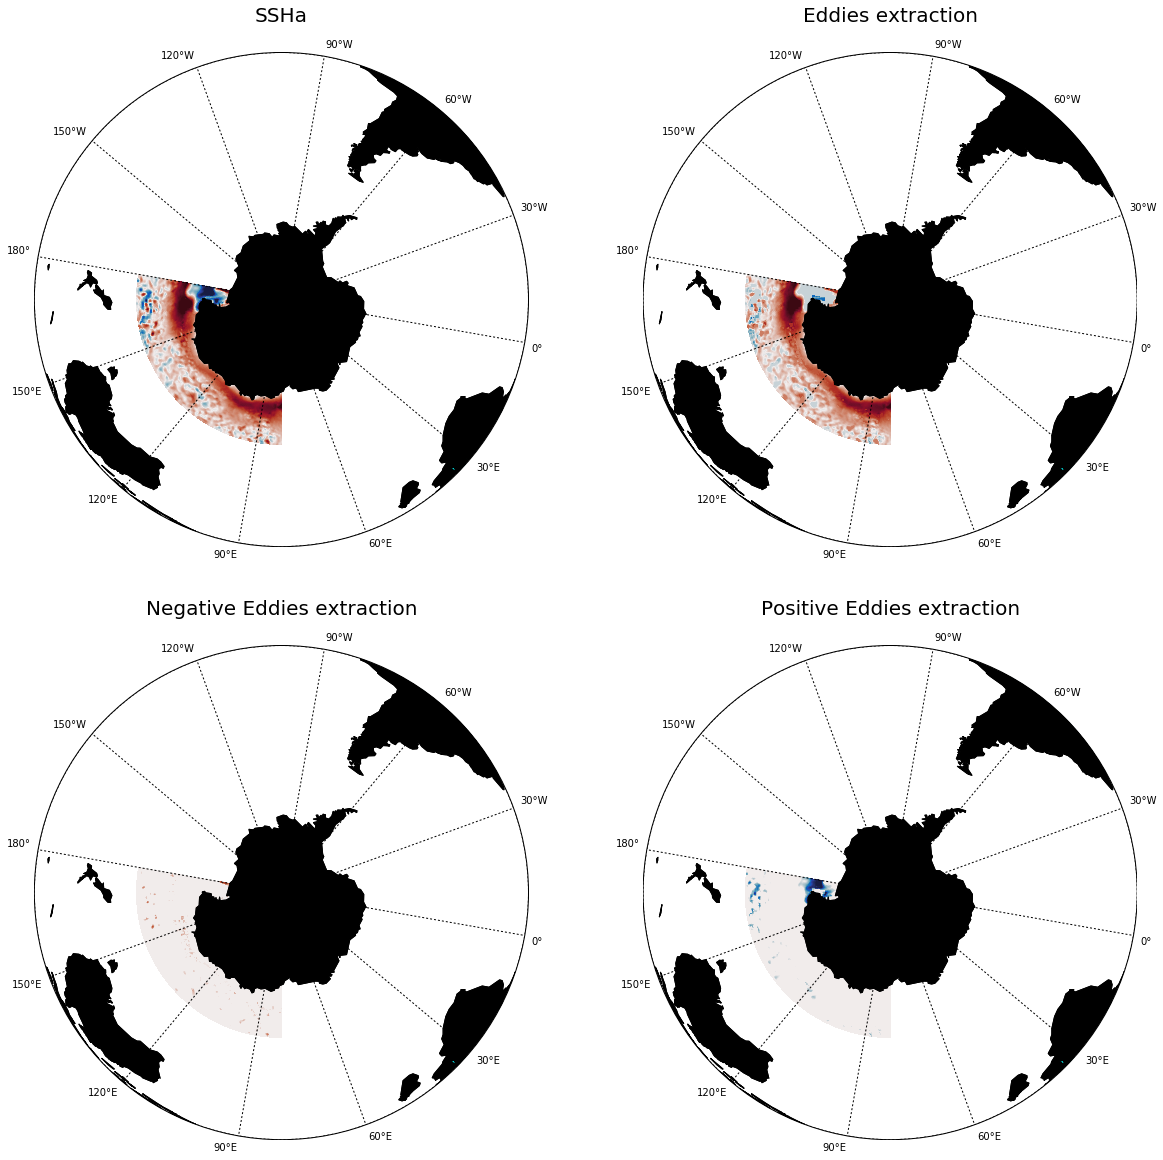

In [9]:
basemap_mplot(lon,lat,[ssha[1,:,:],ssha[1,:,:]-eddysplot[:,:]-eddysplotn[:,:],\
                       eddysplotn[:,:],eddysplot[:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal.jpg', bbox_inches='tight')

In [10]:
threshold=1
eddysplotn=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplot=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


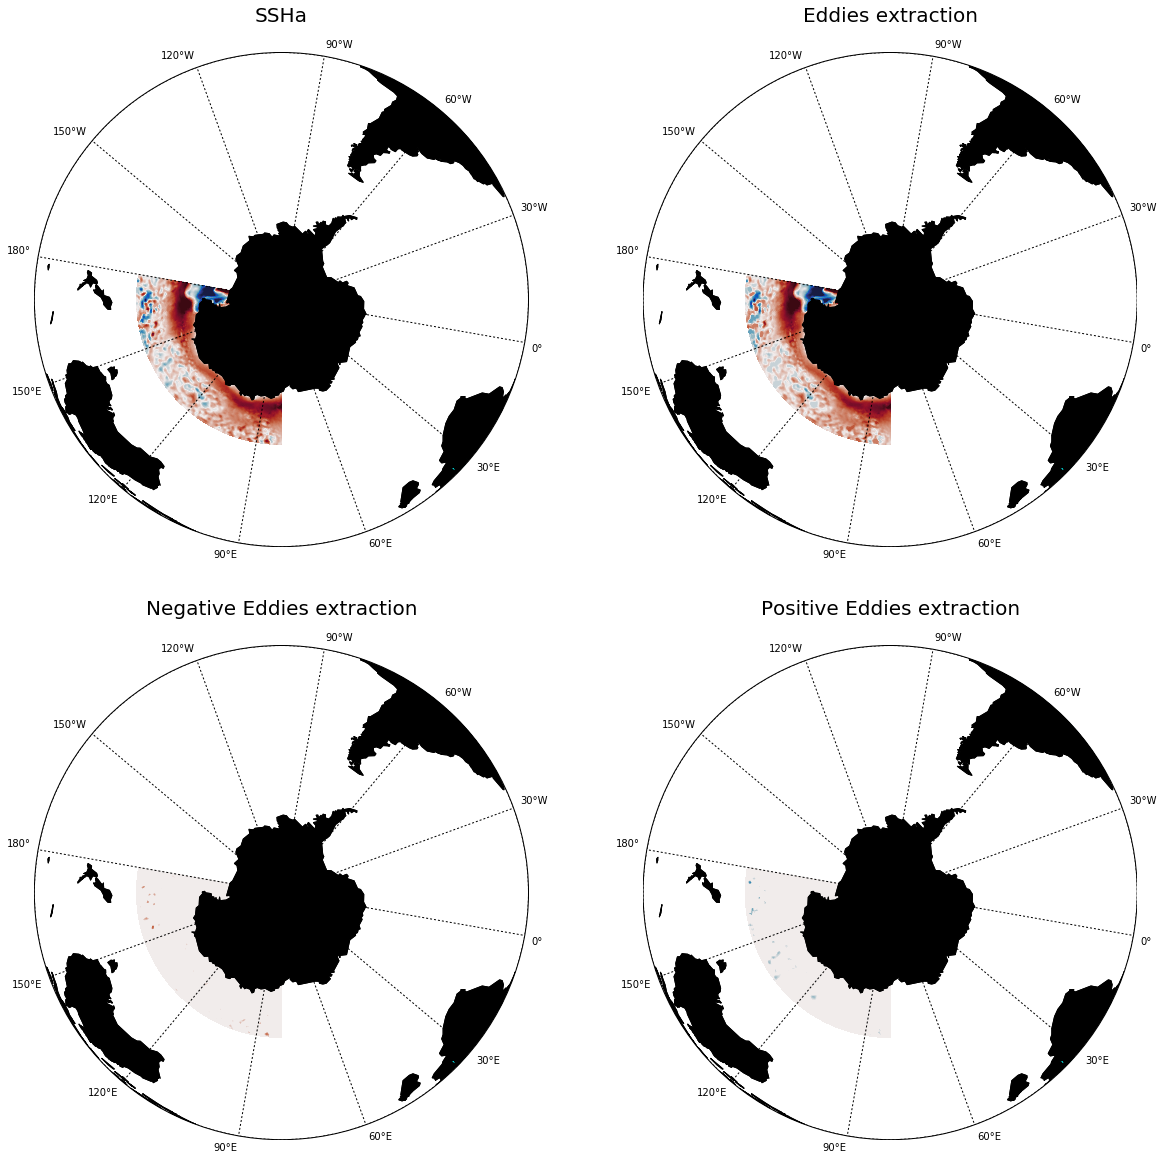

In [11]:
basemap_mplot(lon,lat,[ssha[3,:,:],ssha[3,:,:]-eddysplot[3,:,:]-eddysplotn[3,:,:],\
                       eddysplotn[3,:,:],eddysplot[3,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal.jpg', bbox_inches='tight')

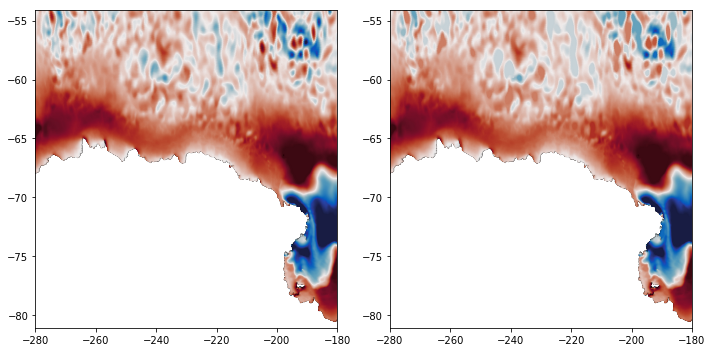

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 2)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
quad1 = ax1.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)

ax2 = plt.subplot(gs[0,1])

lonmm,latmm=np.meshgrid(lon,lat)

ssha[3,:,:],ssha[3,:,:]-eddysplot[3,:,:]-eddysplotn[3,:,:],\
                       eddysplotn[3,:,:],eddysplot[3,:,:]

quad2 = ax2.pcolormesh(lon,lat,ssha[0,:,:]-eddysplot[0,:,:]-eddysplotn[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)

def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    quad2.set_array((ssha[iter,:,:]-eddysplot[iter,:,:]-eddysplotn[iter,:,:]).ravel())
    return quad1,quad2

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)
plt.show()

In [13]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[14]
[15]
[16]
[19]
[20]
[22]
[23]


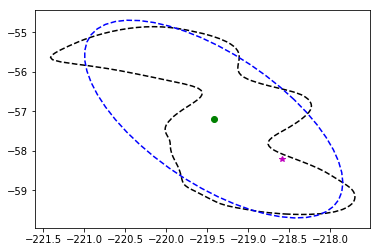

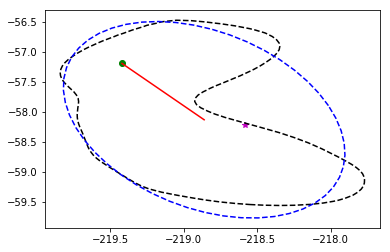

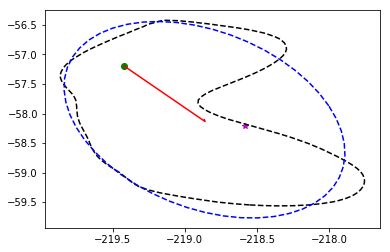

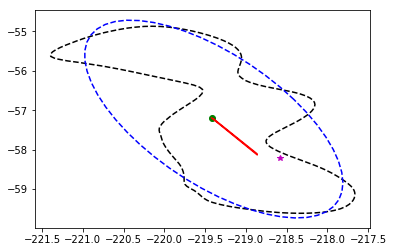

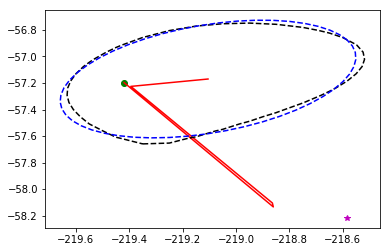

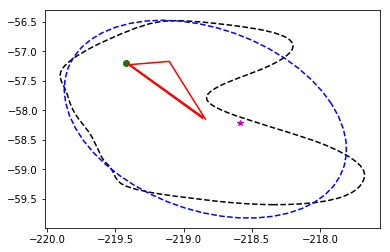

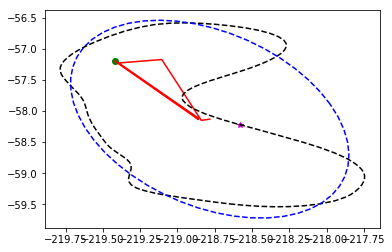

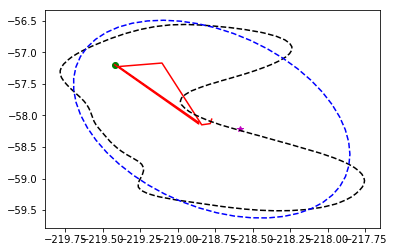

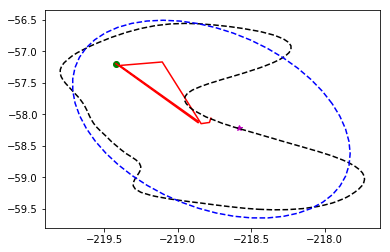

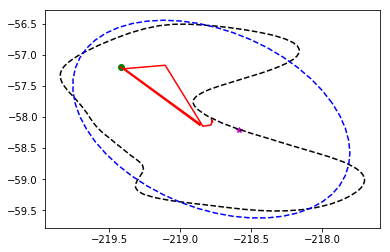

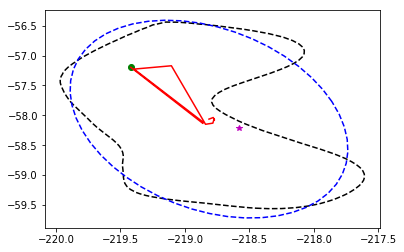

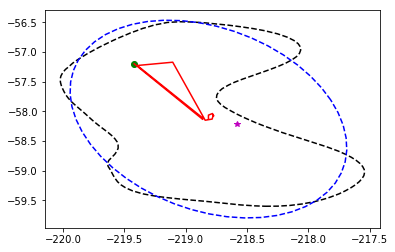

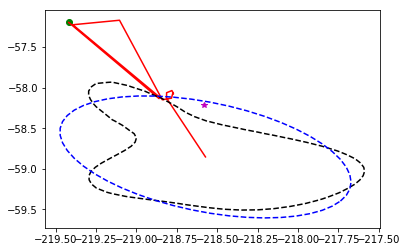

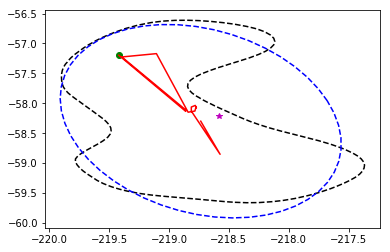

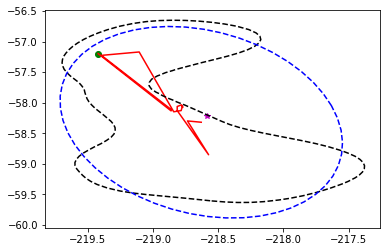

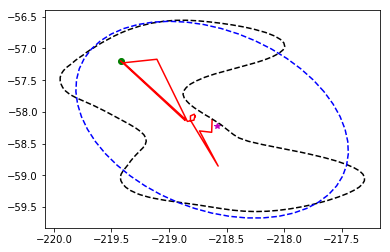

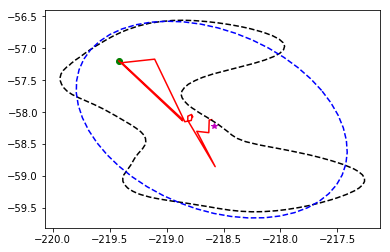

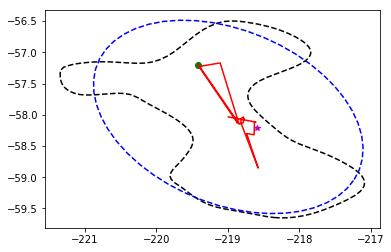

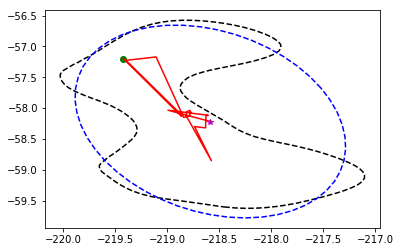

In [14]:
eddy=eddytdn['eddyn_25']
359

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')

(2, 19)


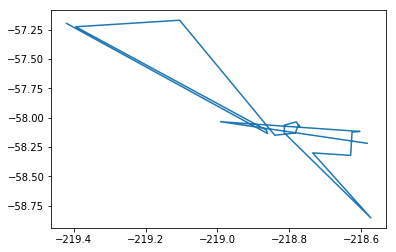

In [15]:
print(shape(eddy['position_eddy'].T))
plot(eddy['position_eddy'].T[0,:],eddy['position_eddy'].T[1,:])

In [16]:
print(len(eddytdn.items()))

778


In [17]:
eddy=0
positions=zeros([2,len(eddytdn.items()),90])
for key,value in eddytdn.items():
    if type(value['time'])==int:
        #print(shape(value['position_eddy'][:]),shape(xpositions))
        positions[0,eddy,value['time']]=value['position'][0]
        positions[1,eddy,value['time']]=value['position'][1]
        
    else:
        realinx=0
        for ii in value['time']:
            #print(shape(squeeze(value['position_eddy'][realinx,0])))
            positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
            positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
            realinx=realinx+1
    eddy=eddy+1
    
positions[positions==0]=np.nan

    #if type(value['time'])!=int:
    #    xpositions=
    #    plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
    #    plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
    #    plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')

In [18]:
for ii in range(shape(positions)[1]):
    sumjj=0
    for jj in range(shape(positions)[2]):
        if positions[0,ii,jj]!=np.nan:
            #print(positions[0,ii,jj])
            sumjj=sumjj+1
    print(ii,sumjj)

0 90
1 90
2 90
3 90
4 90
5 90
6 90
7 90
8 90
9 90
10 90
11 90
12 90
13 90
14 90
15 90
16 90
17 90
18 90
19 90
20 90
21 90
22 90
23 90
24 90
25 90
26 90
27 90
28 90
29 90
30 90
31 90
32 90
33 90
34 90
35 90
36 90
37 90
38 90
39 90
40 90
41 90
42 90
43 90
44 90
45 90
46 90
47 90
48 90
49 90
50 90
51 90
52 90
53 90
54 90
55 90
56 90
57 90
58 90
59 90
60 90
61 90
62 90
63 90
64 90
65 90
66 90
67 90
68 90
69 90
70 90
71 90
72 90
73 90
74 90
75 90
76 90
77 90
78 90
79 90
80 90
81 90
82 90
83 90
84 90
85 90
86 90
87 90
88 90
89 90
90 90
91 90
92 90
93 90
94 90
95 90
96 90
97 90
98 90
99 90
100 90
101 90
102 90
103 90
104 90
105 90
106 90
107 90
108 90
109 90
110 90
111 90
112 90
113 90
114 90
115 90
116 90
117 90
118 90
119 90
120 90
121 90
122 90
123 90
124 90
125 90
126 90
127 90
128 90
129 90
130 90
131 90
132 90
133 90
134 90
135 90
136 90
137 90
138 90
139 90
140 90
141 90
142 90
143 90
144 90
145 90
146 90
147 90
148 90
149 90
150 90
151 90
152 90
153 90
154 90
155 90
156 90
157 90
158 

In [19]:
print(positions[0,24])

[-219.30234676 -218.99210898 -218.98320209 -219.30233838 -219.1054105
 -218.95732028 -218.93060745 -218.935711   -218.93285005 -218.93368994
 -218.92705262 -218.93251335           nan           nan -218.50089315
 -218.89414575 -218.91053073           nan           nan -218.91820255
 -218.91823908           nan -218.85509129 -218.86993829           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
       

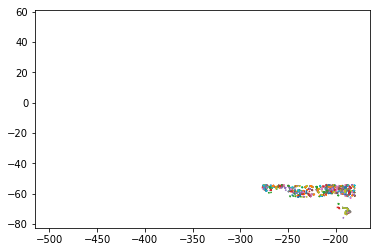

In [20]:
for cc in range(len(eddytdn.items())):
    plot(positions[0,cc,:],positions[1,cc,:])

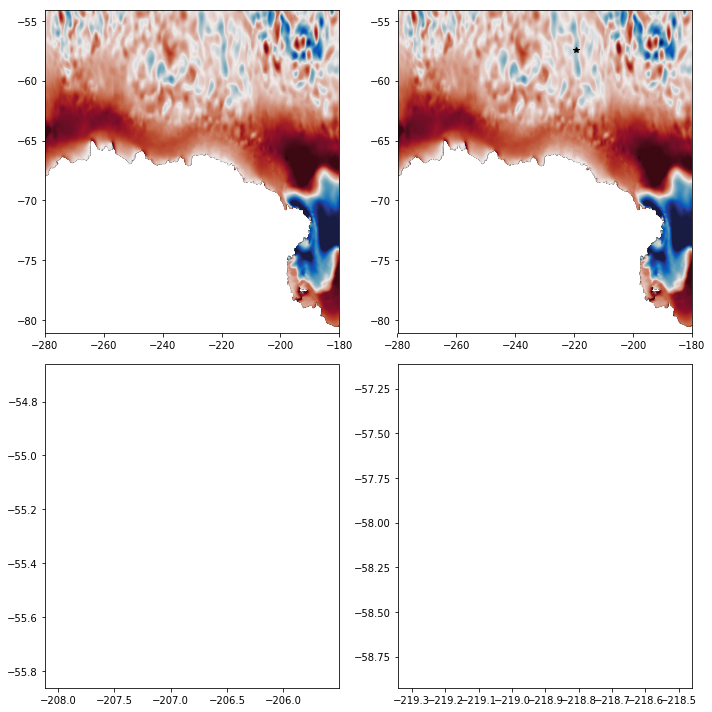

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(2, 2)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

#map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
#lonm,latm=map(lonmm,latmm)
#map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.fillcontinents(color='black',lake_color='aqua')
#map.drawcoastlines()
#map.drawcoastlines()
quad1 = ax1.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)
#dot1, = plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
#dot1, = plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'or')
eddy1=342
eddy2=298
eddy3=24

dot1, = plot(positions[0,eddy2,0],positions[1,eddy2,0],'ok')
line1, = plot(positions[0,eddy2,0],positions[1,eddy2,0],'-k')

#for cc in range(len(eddytdn.items())):
#    line2,=plot(positions[0,cc,:],positions[1,cc,:],'--k')

    
#plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
#plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
#plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
#plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')

#cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])
lonmm,latmm=np.meshgrid(lon,lat)

#map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax2)
#lonm,latm=map(lonmm,latmm)
#map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.fillcontinents(color='black',lake_color='aqua')
#map.drawcoastlines()
#map.drawcoastlines()
quad2 = ax2.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)
dot2, = plot(positions[0,eddy3,0],positions[1,eddy3,0],'*k')
line2, = plot(positions[0,eddy3,0],positions[1,eddy3,0],'-k')
#line2,=plot(positions[0,:,0],positions[1,:,0],'--k')

#cb2 = fig.colorbar(quad1,ax=ax2)
ax3 = plt.subplot(gs[1,0])
line3, = plot(positions[0,eddy2,:],positions[1,eddy2,:],'-k')

ax4 = plt.subplot(gs[1,1])
line4, = plot(positions[0,eddy3,:],positions[1,eddy3,:],'-k')

def init():
    quad1.set_array([])
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    return quad1

def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    quad2.set_array(ssha[iter,:,:].ravel())
    line1.set_data(positions[0,eddy2,0:iter],positions[1,eddy2,0:iter])
    line2.set_data(positions[0,eddy3,0:iter],positions[1,eddy3,0:iter])
    line3.set_data(positions[0,eddy2,0:iter],positions[1,eddy2,0:iter])
    line4.set_data(positions[0,eddy3,0:iter],positions[1,eddy3,0:iter])
    #for cc in range(len(eddytdn.items())):
    #    line2.set_data(positions[0,cc,0:iter],positions[1,cc,0:iter])
    return quad1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)
plt.show()

In [22]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

In [23]:
eddy=0
positions=zeros([2,len(eddytdn.items()),90])
for key,value in eddytdn.items():
    if type(value['time'])==int:
        #print(shape(value['position_eddy'][:]),shape(xpositions))
        positions[0,eddy,value['time']]=value['position_eddy'][0]
        positions[1,eddy,value['time']]=value['position_eddy'][1]
        
    else:
        realinx=0
        for ii in value['time']:
            #print(shape(squeeze(value['position_eddy'][realinx,0])))
            positions[0,eddy,ii]=squeeze(value['position_eddy'][realinx,0])
            positions[1,eddy,ii]=squeeze(value['position_eddy'][realinx,1])
            realinx=realinx+1
    eddy=eddy+1
    
positions[positions==0]=np.nan

    #if type(value['time'])!=int:
    #    xpositions=
    #    plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
    #    plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
    #    plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')

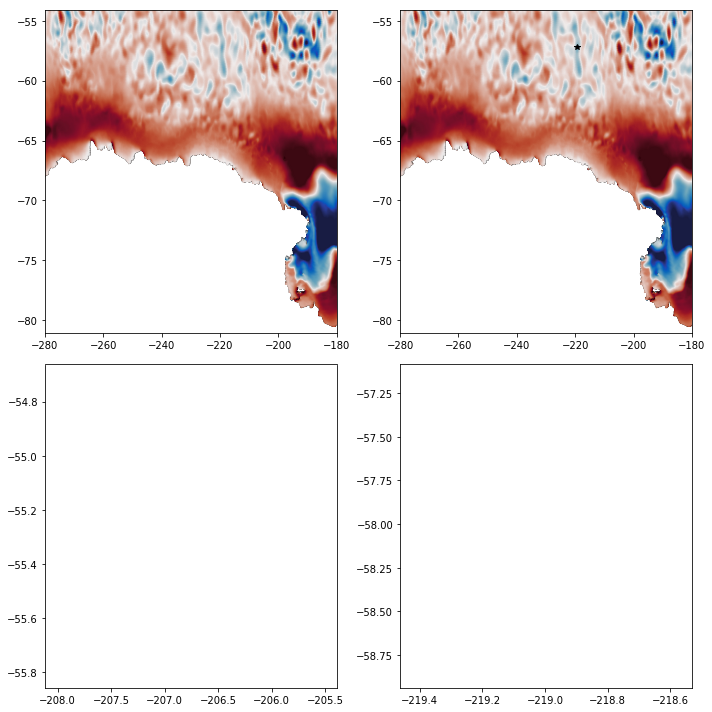

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(2, 2)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

#map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
#lonm,latm=map(lonmm,latmm)
#map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.fillcontinents(color='black',lake_color='aqua')
#map.drawcoastlines()
#map.drawcoastlines()
quad1 = ax1.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)
#dot1, = plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
#dot1, = plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'or')
eddy1=342
eddy2=298
eddy3=24

dot1, = plot(positions[0,eddy2,0],positions[1,eddy2,0],'ok')
line1, = plot(positions[0,eddy2,0],positions[1,eddy2,0],'-k')

#for cc in range(len(eddytdn.items())):
#    line2,=plot(positions[0,cc,:],positions[1,cc,:],'--k')

    
#plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
#plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
#plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
#plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')

#cb1 = fig.colorbar(quad1,ax=ax1)

ax2 = plt.subplot(gs[0,1])
lonmm,latmm=np.meshgrid(lon,lat)

#map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax2)
#lonm,latm=map(lonmm,latmm)
#map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.fillcontinents(color='black',lake_color='aqua')
#map.drawcoastlines()
#map.drawcoastlines()
quad2 = ax2.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)
dot2, = plot(positions[0,eddy3,0],positions[1,eddy3,0],'*k')
line2, = plot(positions[0,eddy3,0],positions[1,eddy3,0],'-k')
#line2,=plot(positions[0,:,0],positions[1,:,0],'--k')

#cb2 = fig.colorbar(quad1,ax=ax2)
ax3 = plt.subplot(gs[1,0])
line3, = plot(positions[0,eddy2,:],positions[1,eddy2,:],'-k')

ax4 = plt.subplot(gs[1,1])
line4, = plot(positions[0,eddy3,:],positions[1,eddy3,:],'-k')

def init():
    quad1.set_array([])
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line4.set_data([],[])
    return quad1

def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    quad2.set_array(ssha[iter,:,:].ravel())
    line1.set_data(positions[0,eddy2,0:iter],positions[1,eddy2,0:iter])
    line2.set_data(positions[0,eddy3,0:iter],positions[1,eddy3,0:iter])
    line3.set_data(positions[0,eddy2,0:iter],positions[1,eddy2,0:iter])
    line4.set_data(positions[0,eddy3,0:iter],positions[1,eddy3,0:iter])
    #for cc in range(len(eddytdn.items())):
    #    line2.set_data(positions[0,cc,0:iter],positions[1,cc,0:iter])
    return quad1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=False)
plt.show()

In [25]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

In [26]:
eddy=0
contours=zeros([2,len(eddytdn.items()),90])
for key,value in eddytdn.items():
    if type(value['time'])==int:
        #print(shape(value['position_eddy'][:]),shape(xpositions))
        contours[0,eddy,value['time']]=value['contour'][0]
        contours[1,eddy,value['time']]=value['contour'][1]
        
    else:
        realinx=0
        for ii in value['time']:
            #print(shape(squeeze(value['position_eddy'][realinx,0])))
            contours[0,eddy,ii]=squeeze(value['contour'][realinx,0])
            contours[1,eddy,ii]=squeeze(value['contour'][realinx,1])
            realinx=realinx+1
    eddy=eddy+1
    
positions[positions==0]=np.nan

ValueError: setting an array element with a sequence.

In [ ]:
for tt in range(0,90):
    pcolormesh(lon,lat,ssha[tt,:,:],vmin=-40,vmax=40)
    for ed in range(len(eddytdn.items())):
    
        plot(positions[0,ed,0:tt],positions[1,ed,0:tt],'--k')
    show()

In [ ]:
def exeddydt(eddydt,lat,lon,data,threshold,inside='',diagnostics=False):
    '''*************Extract Eddy***********
    Function to extract each eddy in multiple timesteps using closed contours.
    Usage:
    eddydt= Eddy data structure
    lon,lat=longitude and latitude of your grid.
    levels=Level of the contour
    Example:
    Author: Josue Martinez Moreno, 2017
    '''
    justeddy=np.zeros(np.shape(data))
    print('*******Removing of eddies******')
    for key, value in eddydt.items():
        if type(value['time'])==int:
            time=[value['time']]
        else:
            time=[]
            for ii in value['time']:
                time.append(ii[0])
        ct=0 
        for tt in time:
            if len(value['level'])!= 1:
                level=value['level'][ct]
            else:
                level=value['level']
            if type(value['time'])==int:
                lonmi=value['contour'][0][0].min()
                lonma=value['contour'][0][0].max()
                latmi=value['contour'][0][1].min()
                latma=value['contour'][0][1].max()
            else:
                lonmi=value['contour'][ct][0].min()
                lonma=value['contour'][ct][0].max()
                latmi=value['contour'][ct][1].min()
                latma=value['contour'][ct][1].max()
            
            mimcx,mimcy=find2d(lon,lat,lonmi,latmi)
            mamcx,mamcy=find2d(lon,lat,lonma,latma)
            loncm=lon[mimcx-threshold:mamcx+1+threshold]
            latcm=lat[mimcy-threshold:mamcy+1+threshold]
            
            if mimcx==0:
                mimcx=1
            if mimcy==0:
                mimcy=1
            if inside == '':
                datacm=data[tt,mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]-level
                if level > 0:
                    datacm[datacm<=0]=0
                    datacm[datacm>=1000]=0
                elif level < 0:
                    datacm[datacm>=0]=0
                    datacm[datacm<=-1000]=0
            else:
                datacm=data[tt,mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]*1
                insidecm=inside[tt,mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]*1
                if level > 0:
                    insidecm[insidecm<=level]=0
                    insidecm[insidecm>=level]=1
                elif level < 0:
                    insidecm[insidecm>=level]=0
                    insidecm[insidecm<=level]=1
                #if np.shape(insidecm)!=np.shape(datacm):
                #    print('Inside and general field should have the same shape')
                #else:
                datacm=datacm*insidecm
                
            if diagnostics==True:
                plt.figure()
                plt.pcolormesh(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm)
                #plt.contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],insidecm)
                plt.colorbar()
                cca=plt.contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm,alpha=0.5)
                plt.plot(value['contour'][ct][0],value['contour'][ct][1],'-m')
                plt.show()
            justeddy[tt,mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]=datacm
            
            ct=ct+1  
    print('*******End the Removing of eddies******')
    return justeddy

def exeddy(eddydt,lat,lon,data,ct,threshold,inside='',diagnostics=False):
    '''*************Extract Eddy***********
    Function to extract each eddy using closed contours.
    Usage:
    eddydt= Eddy data structure
    lon,lat=longitude and latitude of your grid.
    levels=Level of the contour
    Example:
    Author: Josue Martinez Moreno, 2017
    '''
    justeddy=np.zeros(np.shape(data))
    print('*******Removing of eddies******')
    for key, value in eddydt.items():
        #print(type(value['level']))
        #print(len(value['level']))
        if len(value['level'])!= 1:
            level=value['level'][ct]
        else:
            level=value['level']
        #print(level)
        rct=value['time']
        #print(len(value['time']))
        if type(value['time'])==int:
            lonmi=np.array(value['contour'][0][0]).min()
            lonma=np.array(value['contour'][0][0]).max()
            latmi=np.array(value['contour'][0][1]).min()
            latma=np.array(value['contour'][0][1]).max()
        else:
            lonmi=value['contour'][ct][0].min()
            lonma=value['contour'][ct][0].max()
            latmi=value['contour'][ct][1].min()
            latma=value['contour'][ct][1].max()
            
        mimcx,mimcy=find2d(lon,lat,lonmi,latmi)
        mamcx,mamcy=find2d(lon,lat,lonma,latma)
        loncm=lon[mimcx-threshold:mamcx+1+threshold]
        latcm=lat[mimcy-threshold:mamcy+1+threshold]

        if mimcx==0:
            mimcx=1
        if mimcy==0:
            mimcy=1
        if inside == '':
            datacm=data[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]-level
            if level > 0:
                datacm[datacm<=0]=0
                datacm[datacm>=1000]=0
            elif level < 0:
                datacm[datacm>=0]=0
                datacm[datacm<=-1000]=0
        else:
            datacm=data[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]*1
            insidecm=inside[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]*1
            if level > 0:
                insidecm[insidecm<=level]=0
                insidecm[insidecm>=level]=1
            elif level < 0:
                insidecm[insidecm>=level]=0
                insidecm[insidecm<=level]=1
            #if np.shape(insidecm)!=np.shape(datacm):
            #    print('Inside and general field should have the same shape')
            #else:
            datacm=datacm*insidecm
            
        if diagnostics==True:
            plt.figure()
            plt.pcolormesh(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm)
            plt.contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],insidecm)
            plt.colorbar()
            cca=plt.contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm,alpha=0.5)
            plt.plot(value['contour'][0],value['contour'][1],'-m')
            plt.show()
            plt.figure()
            plt.pcolormesh(justeddy)
            plt.show()
            plt.close()
            
        justeddy[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]=datacm
    print('*******End the Removing of eddies******')
    return justeddy